# Bank Customer Segmentation.

The dataset utilized comes from a german bank in 2016 collected by Professor Hoffman of the University of Califonia. 

In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. 

The original dataset required extensive cleaning and variable selection I due to its complicated system of categories and symbols. Several columns are simply ignored, because they were viewed as not important or their descriptions are obscure. The selected attributes are:

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

The objective of this analysis is to segment the German bank's customers based on the various factors (variables) available in their database.

The library makes use of the following packages:

* pandas - to manipulate data frames
* numpy - providing linear algebra
* seaborm - to create visualizations
* matplotlib - basic tools for visualizations
* scikit-learn - machine learning library

In [1]:
# Import relevant packages.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Import dataset.

df = pd.read_csv("german_credit_data.csv")

In [7]:
# Have a look at the first column and 5 rows.

df.head(5)

,index,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,2,49,male,1,own,little,NaN,2096,12,education
3,3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
# Remove the first column as its unnecessary.

df = df.drop(['Unnamed: 0'], axis = 1)

df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Exploratory Data Analysis.

In [16]:
# Overview of entries.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [15]:
# Have a look at number of unique entries.

df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [31]:
# Get unique values in the 'Job' column.

df['Job'].unique()

array([2, 1, 3, 0])

In [30]:
# Get unique values & Value counts in the 'Job' column.

df['Job'].value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [32]:
# Get unique values & Value counts in the 'Housing' column.

df['Housing'].value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [33]:
# Get unique values & Value counts in the 'Saving accounts' column.

df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [34]:
# Get unique values & Value counts in the 'Checking account' column.

df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [23]:
# Get maximum values in the 'Duration' column.

df['Duration'].max()

72

In [24]:
# Get minimum values in the 'Duration' column.

df['Duration'].min()

4

In [35]:
# Get minimum values in the 'Duration' column.

df['Duration'].value_counts()

Duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [52]:
# Get unique values & Value counts in the 'Purpose' column.

df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

### Unique Insight.

*Age*
* There are 53 different ages amongst the 100o entries indicating a slightly broad range of age groups amongst the customers.

*Jobs*
* Most customers have a job or 2 jobs with very few being unemployed.

*Housing*
* Most customers own their homes.

*Savings*
* Majority of customers have whats classified as "little" in their bank accounts.

*Checking*
* Majority of customers have whats classified as "little" in their bank accounts.

*Duration*
* The credit duration is between 4-72 months.
* The manjority of customers have their credit duration between 12 & 24 months.

*Purpose*
* The majority of customers opened their accounts with the purpose of car, radio/TV and furniture/equipment purchase/expenses.


In [53]:
# Converting string values into numerical values.

df_num = df.copy()

# Coding strings.
df_num['Sex'] = df_num['Sex'].astype('category')
df_num['Sex'] = df_num['Sex'].cat.codes

df_num['Housing'] = df_num['Housing'].astype('category')
df_num['Housing'] = df_num['Housing'].cat.codes

df_num['Saving accounts'] = df_num['Saving accounts'].astype('category')
df_num['Saving accounts'] = df_num['Saving accounts'].cat.codes

df_num['Checking account'] = df_num['Checking account'].astype('category')
df_num['Checking account'] = df_num['Checking account'].cat.codes

df_num['Purpose'] = df_num['Purpose'].astype('category')
df_num['Purpose'] = df_num['Purpose'].cat.codes

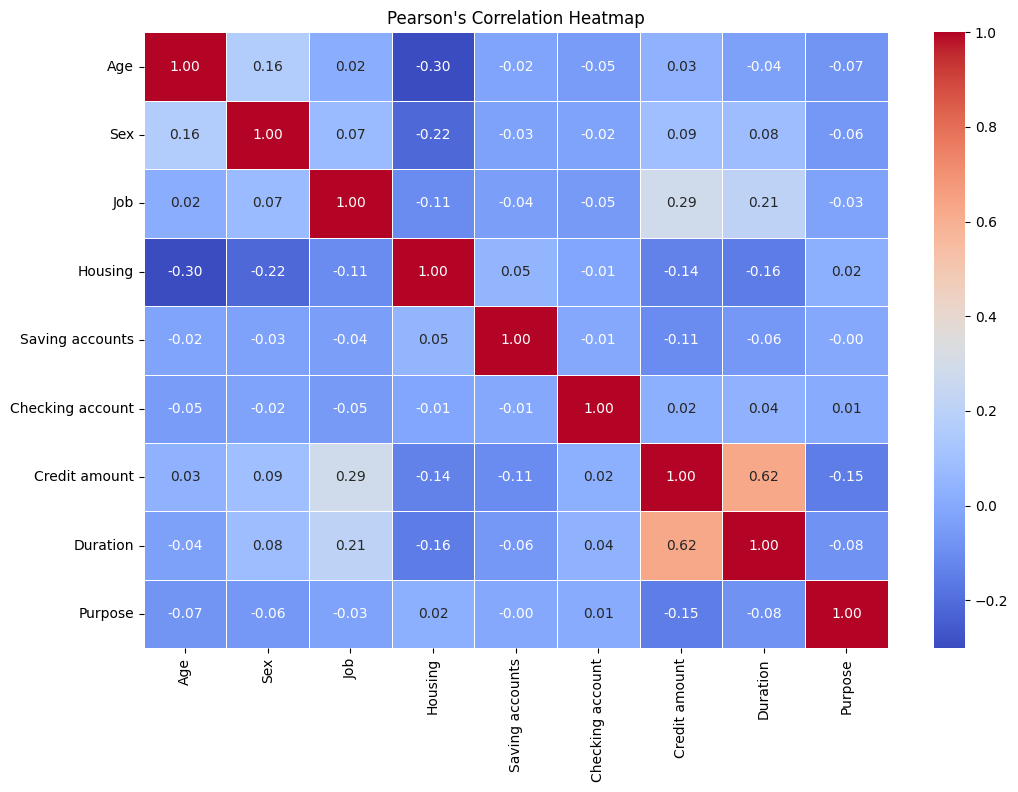

In [54]:
# Creating a correlation heatmap.
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the heatmap
plt.title("Pearson's Correlation Heatmap")
plt.show()


### Unique Insight.

* Majority of the variables arent significantly correlated to each other except Credit amount and duration which is expected as per bank practices i.e. the higher your credit amount the higher the chances that you have a longer repayment period/can negotiate with the bank for an extension on repayment.
* The 'Job' variable is slightly correlated with 'Credit amount' and 'Duration' which is also expected. The more the number of jobs a customer has the higher the credit amounts.

In [62]:
# A function which will generate plots for three numeric variables with stratification by gender by selected categorical column.

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

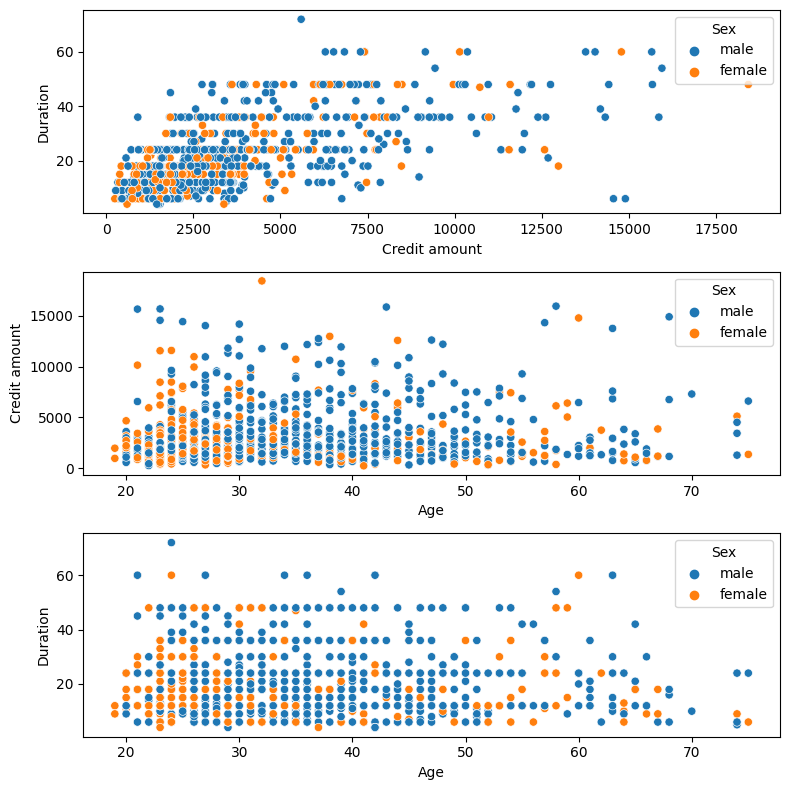

In [64]:
# A scatterplot showing the stratification between Duration, Age and credit amount.

scatters(df, h = "Sex")

### Unique Insights.

First impressions indicate that majority of men and women have the same credit amount & duration however a higher amount of men have a higher credit amount & duration compared to women.

There's not much indication of a correlation between age and credit amount and duration and age however majority of the women seem to be younger.

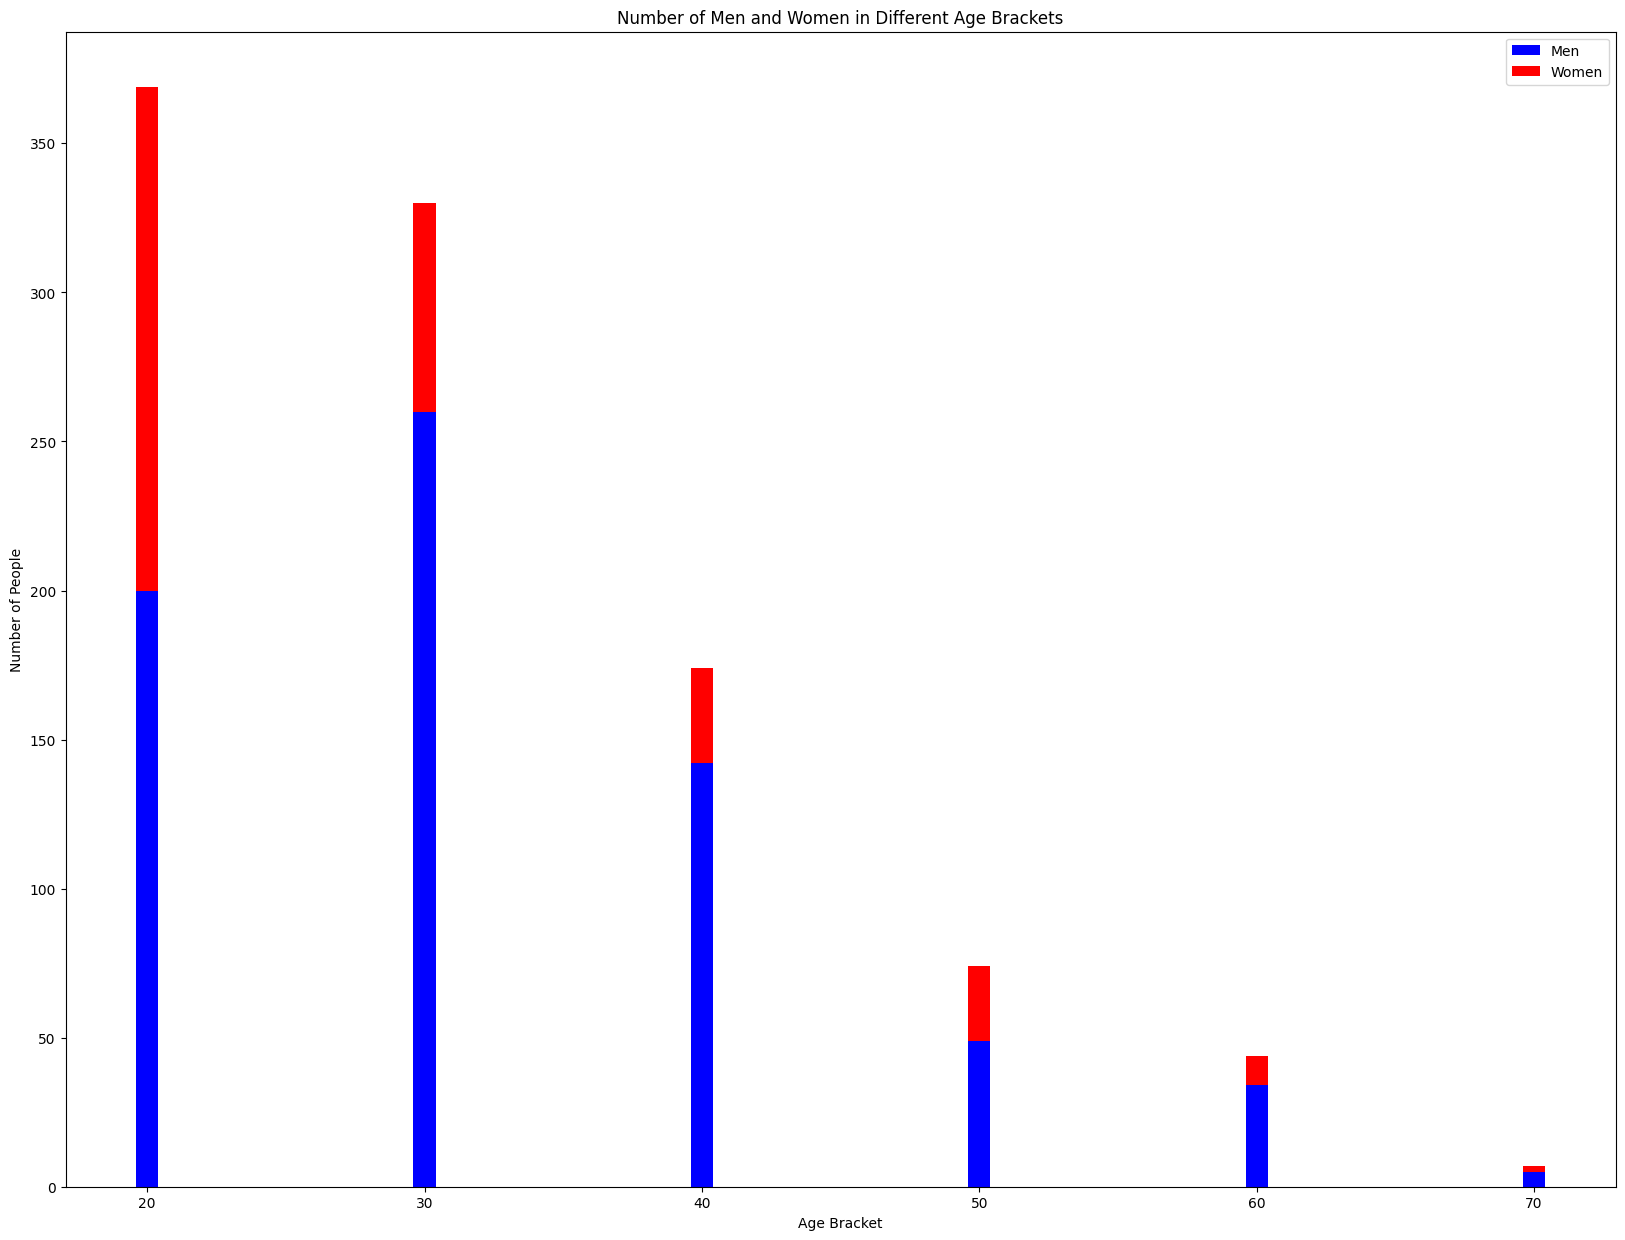

In [69]:
# Discovery of the number of men and women in different age brackets.

age_brackets = [20, 30, 40, 50, 60, 70]
men_count = []
women_count = []
for bracket in age_brackets:
    men_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'male')]))
    women_count.append(len(df[(df['Age'] >= bracket) & (df['Age'] < bracket + 10) & (df['Sex'] == 'female')]))

# Create a bar graph
plt.figure(figsize=(20, 15))
plt.bar(age_brackets, men_count, label='Men', color='blue')
plt.bar(age_brackets, women_count, bottom=men_count, label='Women', color='red')
plt.xlabel('Age Bracket')
plt.ylabel('Number of People')
plt.title('Number of Men and Women in Different Age Brackets')
plt.xticks(age_brackets)
plt.legend()
plt.show()

### Unique Insight.

The visualization above indicates that although most of the women are between the age of 20-30, the men are more in all age brackets therefore explains why more men can be observed having a higher credit amount and duration.

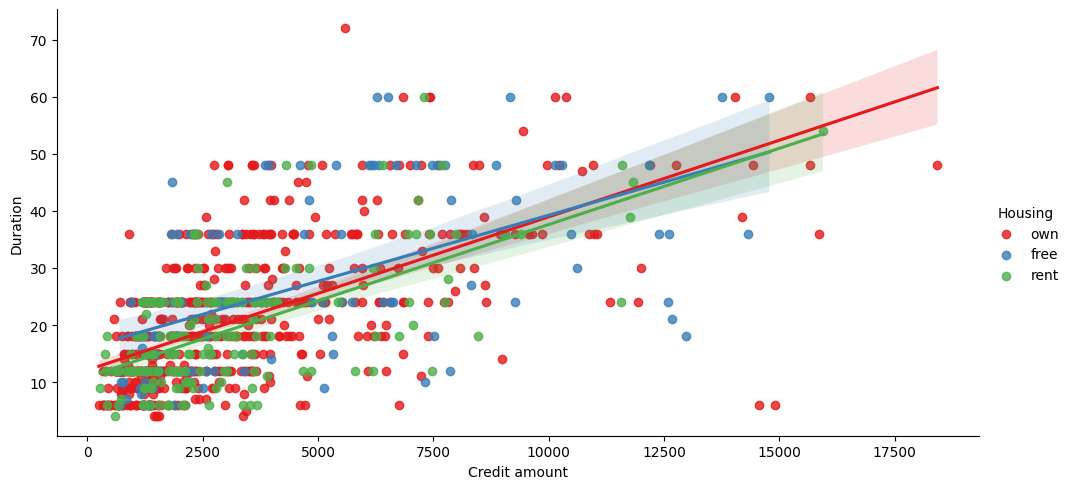

In [71]:
# Credit amount & Duration x Housing.

sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()

### Unique Insight.

* The visualization above shows that a majority of the customers that rent have a lower credit amount and duration.

* The customers who own their houses have the highest credit amounts & duration as expected.

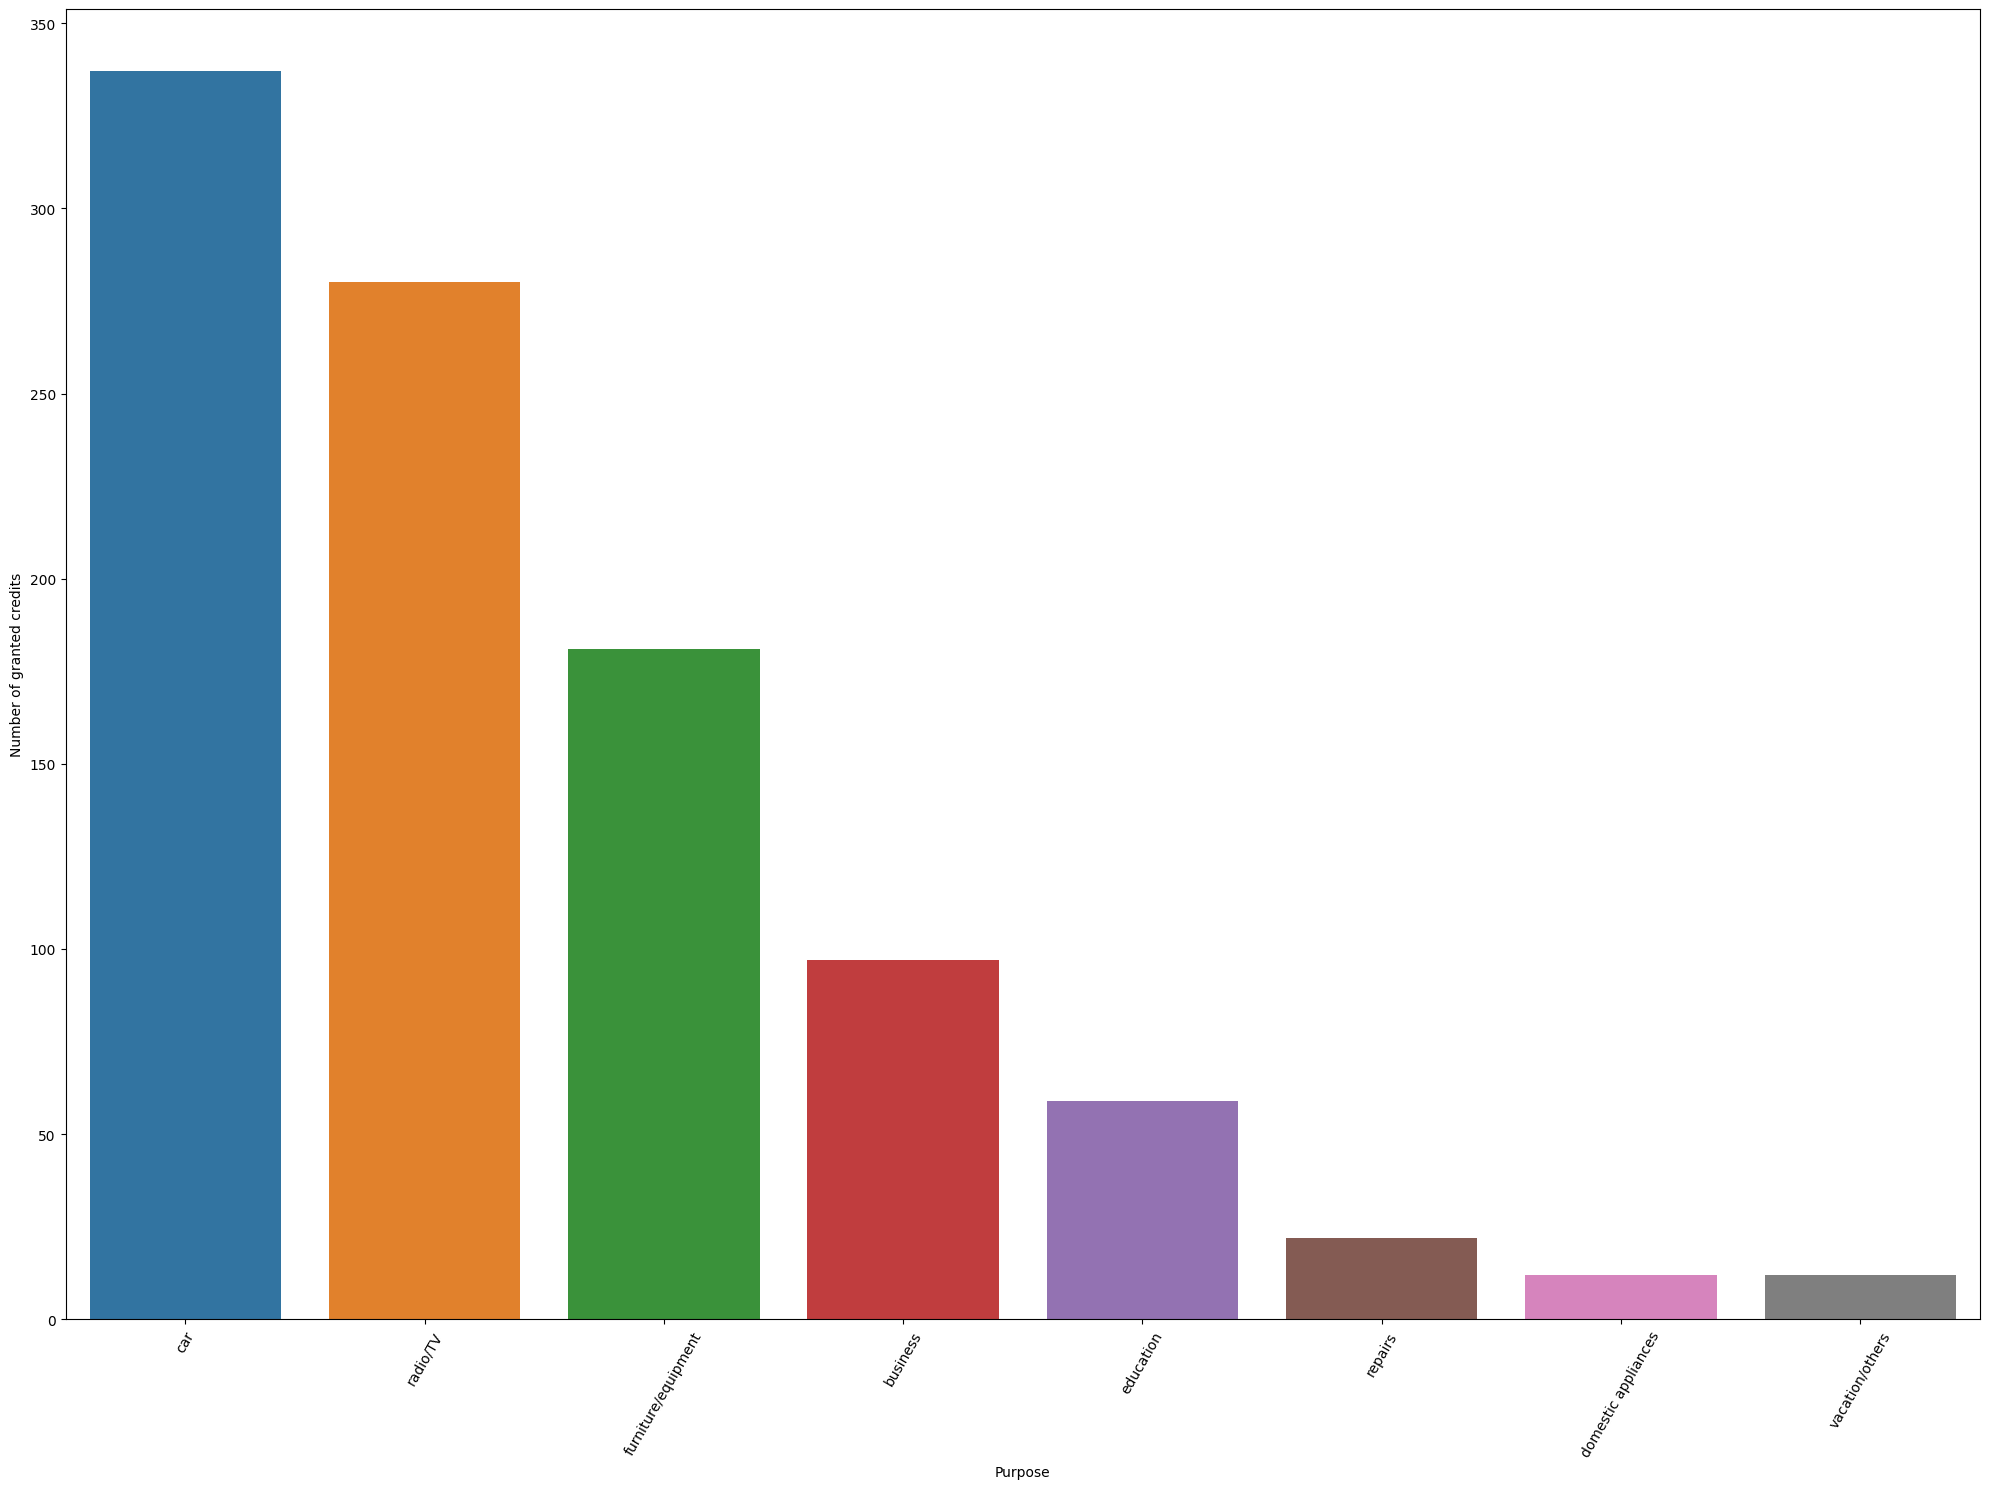

In [74]:
# Loans awarded vs Purpose.

n_loans = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_loans.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(20,15))
bar = sns.barplot(x="Purpose",y="Count",data=n_loans)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

### Unique Insight.

The barplot above shows how many loans granted for various purposes. 

Most of loans were granted for car and radio/TV.

In [78]:
#Defining function that creates a boxplot.

def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

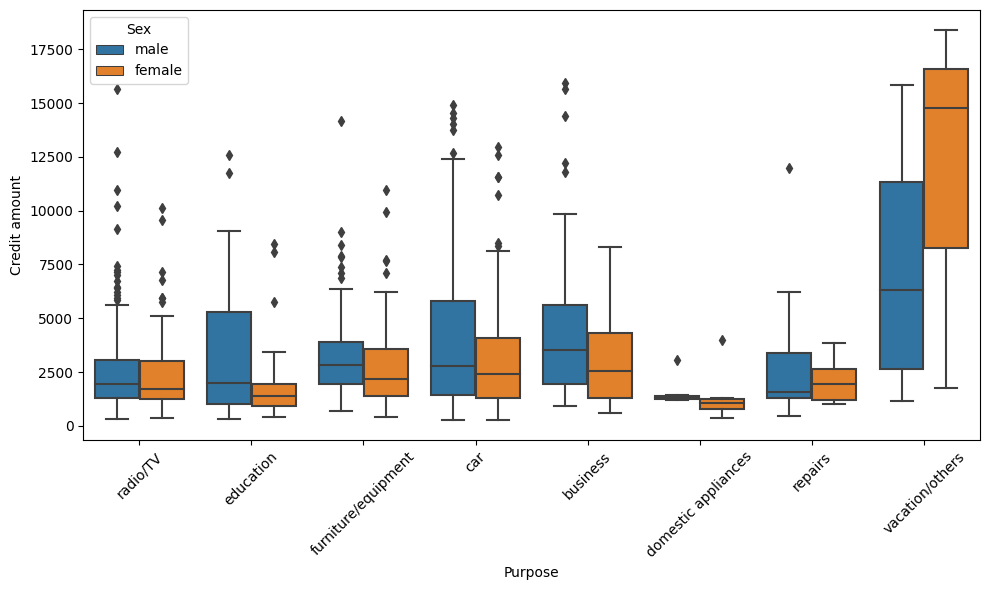

In [79]:
# Create a boxplot of Purpose, Credit amount and sex.

boxes("Purpose","Credit amount","Sex")

### Unique Insight.

The plot above shows that the biggest amounts are taken for vacations/others, the smallest for domestic appliances. Most of them have outliers on the upper side of the boxes (higher amounts). 

The difference between men and women is insignificant in the radio/TV category.
The following categories saw men taking higher credit amounts:
* Education.
* Furniture/equipment.
* Car.
* Repairs.

The following categories saw women taking higher credit amounts:
* Vacation/other.

These observations might indicate which purposes are mostly valued by men and women and should be a compass for the sales Team leaders in the banks on their strategies and resource allocations.

However, there was very little number of credits granted in this category.

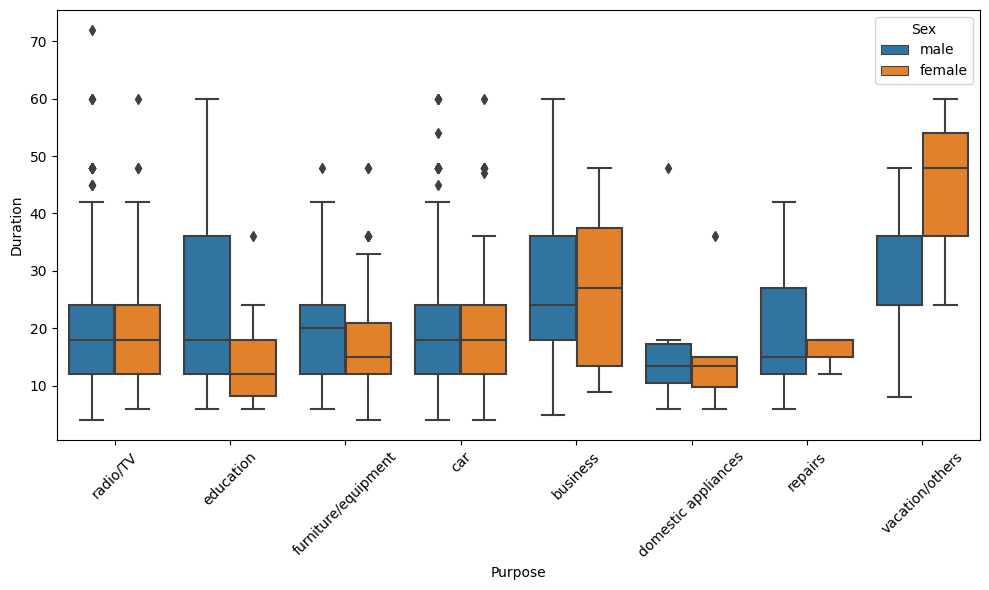

In [80]:
boxes("Purpose","Duration","Sex")

# Unique Insight.

The visualization above indicates that although in some cases such as business loans, men get higher amounts, women get longer credit duration on their loans.

In some cases men have higher credit amounts but get the same credit duration such as car loans.

Some observations are consistent such as higher loan durations for men in the education, furniture/equipment and repair loans loans compared to women.

The vacation/other loans saw that women had higher loan durations compared to men consistent with loan amounts.

These observations might be due to bank policies, agreements with relationship managers, unique customer profiles, difference in loan products and customer preference.


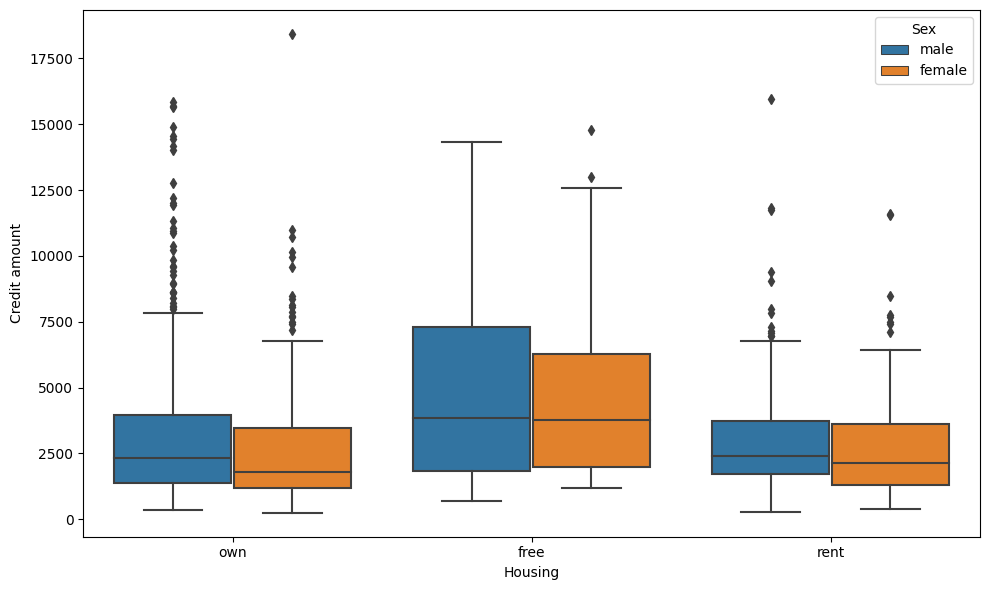

In [81]:
boxes("Housing","Credit amount","Sex",r=0)

### Unique Insight.

Males had higher credit amounts whether they owned, rented or lived in free living spaces however the greatest outlier was observed at a female who owned a home. She had the highest credit amount overall.

Those who lived in free-housing spaces had the highest credit amounts overall.

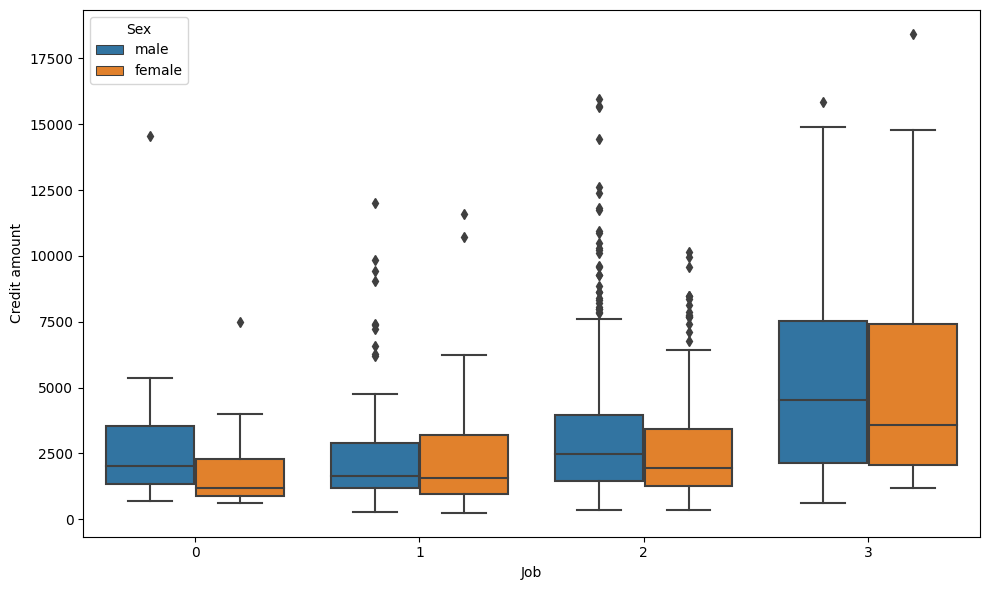

In [82]:
boxes("Job","Credit amount","Sex",r=0)

### Unique Insight.

The customers with three jobs had the highest credit amounts for both men and women which makes sense because they would be observed to have the greatest stability and maybe highest income.

For customers who lacked employment, the men still had higher credit amounts compared to the women while for customers working two jobs the males also had a higher credit amount compared to the women which was contrary to what was observed for customers who had 1 source of income.

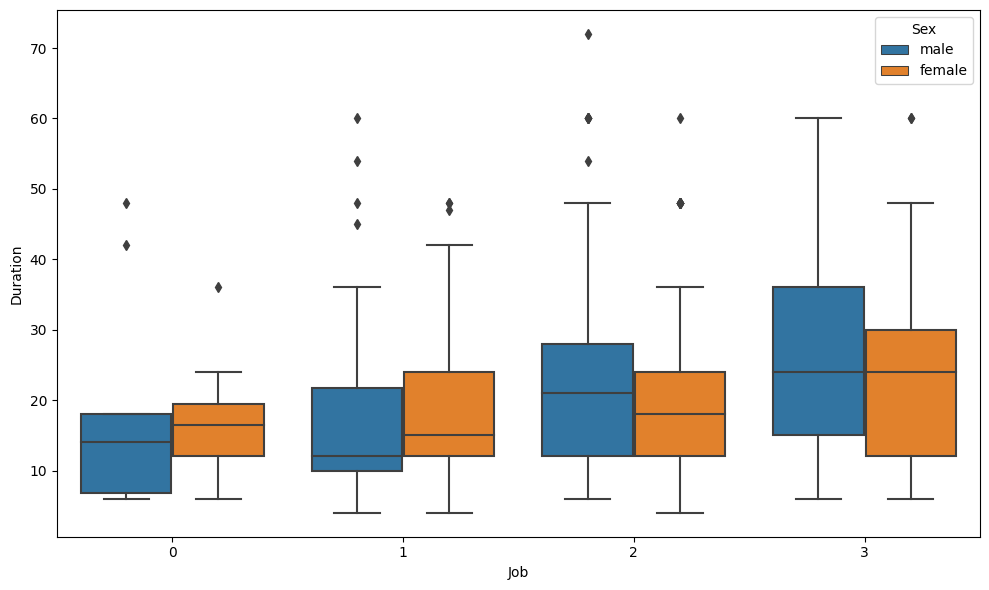

In [83]:
boxes("Job","Duration","Sex",r=0)

### Unique Insight.

The plot above shows that customers with three jobs have the highest loan durations with males having significantly higher durations compared to women, which was also in line with the customers who have two jobs.

For unemployed customers the males had slighly lower durations even with higher amounts similarly the customers with one job have lower loan durations for men compared to women.

## Clustering with K-means.

Cluster analysis is a technique used in data mining and machine learning to group similar objects into clusters. 

K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized

In [85]:
# Selecting columns for clusterisation with k-means.

selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:,selected_cols]

### Elaboration.

The above variables have been chosen as they have been selected to define the customers the most thus utilized to cluster customers into various groups.

In [86]:
# Defining a function which plots three histograms - one for each variable.

def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

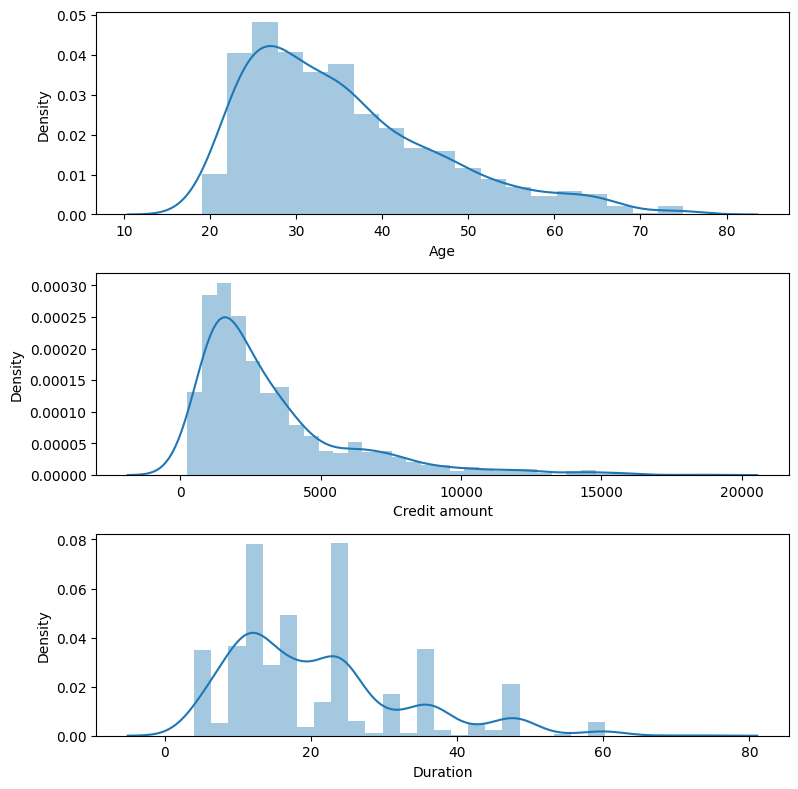

In [87]:
# Having a look at the distribution of data withing the cluster chosen variables.

distributions(cluster_data)

### Unique Insight.

We can observe that the variable distributions are more right-skewed i.e. for age, more consumers are younger, for the credit amount and duration most of the consumers have access to lower credit amounts and duration.

Because of this we should remove the skewness by logarithmic transformation as a form of normalization.

This is done to eliminate redundant data (outliers) and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.

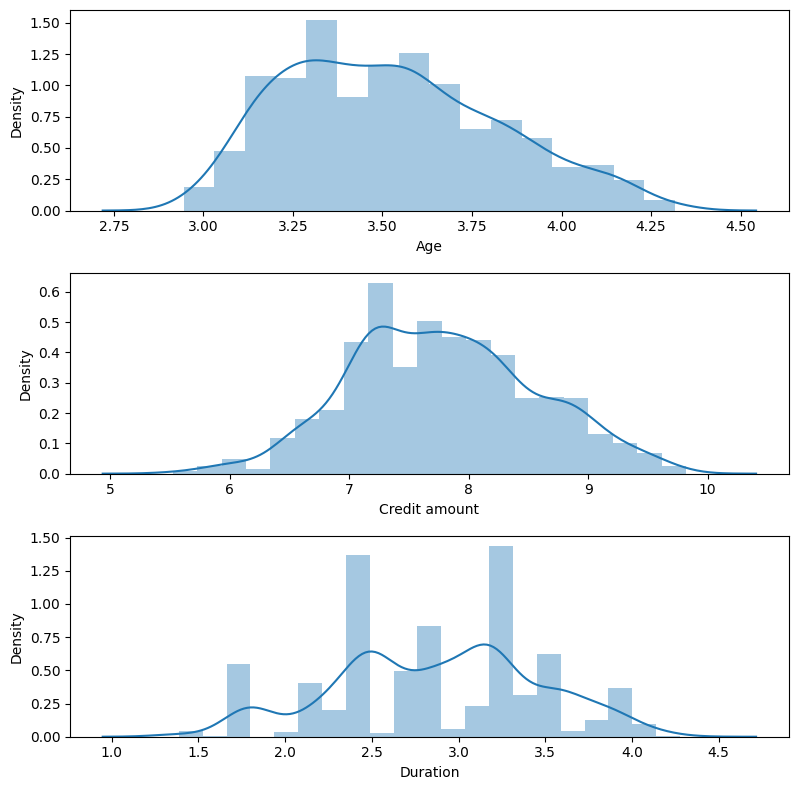

In [88]:
# Eliminating skewness using logarithmic transformation.

cluster_log = np.log(cluster_data)
distributions(cluster_log)

### Obervation.

Its visible that the data us more centered because the distribution is more centered.

The next step is scaling the variables.

In [89]:
# Using StandardScaler (Sklearn) to standardize the variables.

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

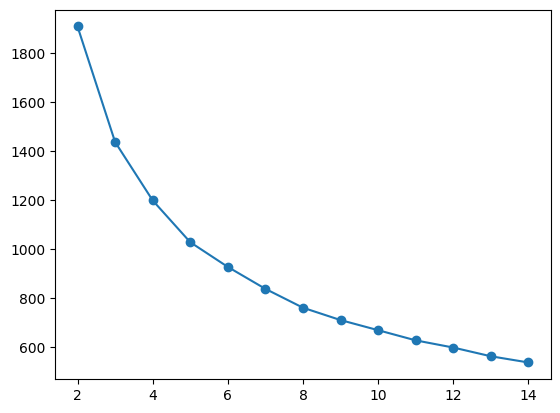

In [90]:
# Observation of inertia with increase in the number of clusters via a line plot.

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

### Elaboration.

Inertia is calculated as the sum of squared distance for each point to its closest centroid, i.e., its assigned cluster. 

Inertia is desired to decrease with increase in the number of clusters i.e. the sum of squared distance to decrease because the less the inertia the closer the point to the cluster mean which is the group mean (its fit in the cluster).

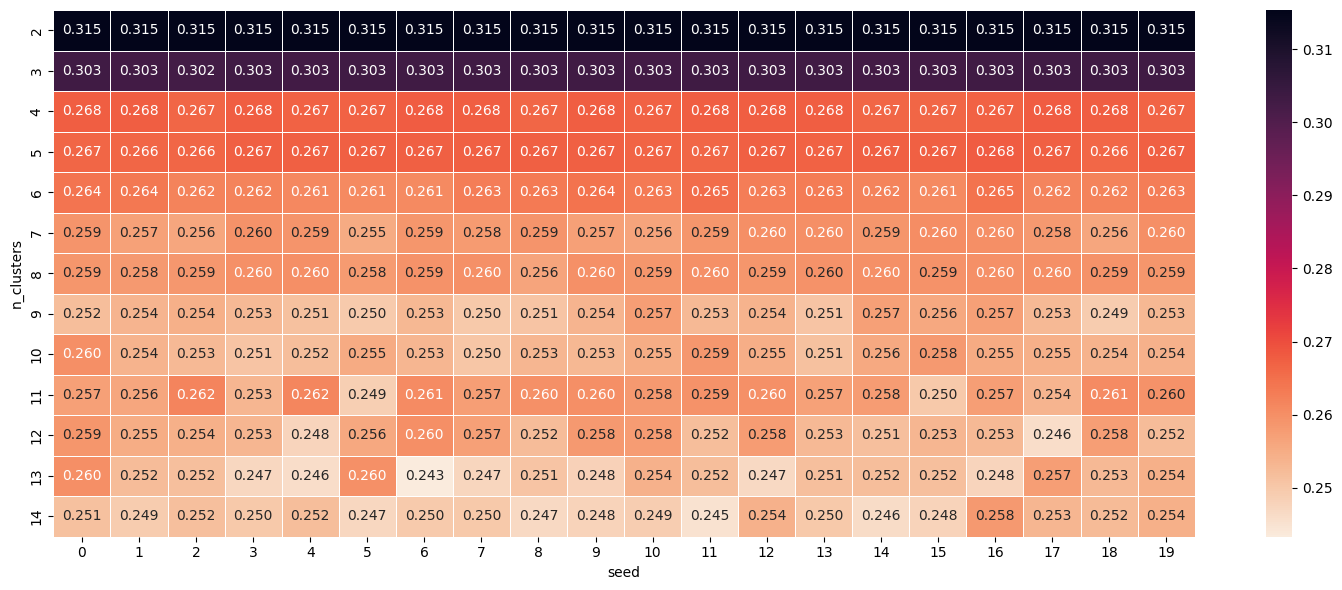

In [91]:
# Finding the best fit (optimum) cluster through silhouette scoring that uses random seed cluster sampling (2-15 clusters) and layout results in a heatmap.

from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

### Obervation.

The heatmap above shows silhouette scores for various combinations of random state and number of clusters. 

The highest scores are for 2 and 3 clusters and they are relatively insensitive to seed.

3 clusters will be selected for this data exploration.

### About Silhouette Scoring.

This metric of validating clustering uses Euclidean distance (the length of the line segment between two points) or manhattan distance (absolute difference of their cartesian points) to determine the cohesion within the cluster (mean distance of a point and all other points within the cluster) and separation from the other clusters (minimum mean distance of a point and all other points within other clusters).

The silhouette score is finally defined as the standardized difference between separation and cohesion. The larger the score the greater the distinction between the clusters and the more optimum the number of clusters are.

The best silhouette distance is the value closes to +1.

In [92]:
# Selecting 3 clusters for K-means clustering.

kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.302902483090709


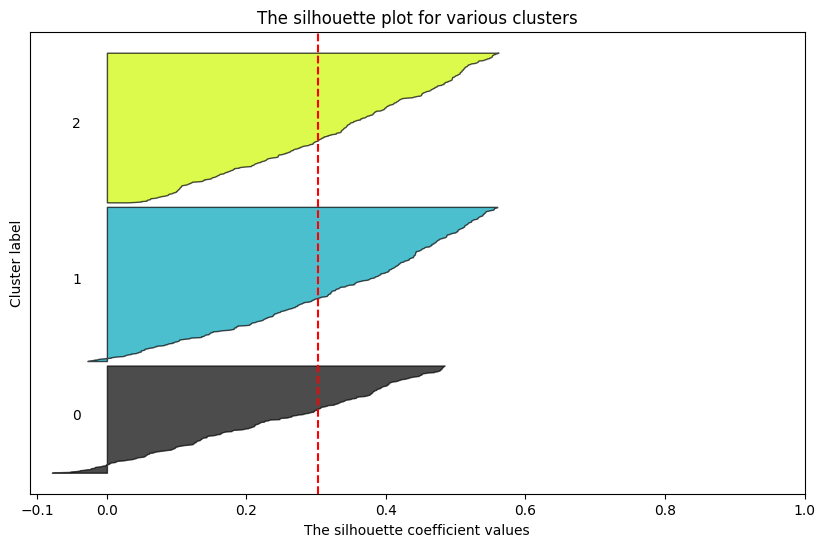

In [93]:
# Plot silhouette graph for 3 clusters so as to show optimization/fit within the three clusters.

import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

### Elaboration.

The plot shows that there are minimal values below 0 indicating that the cluster number selection is quite optimal.

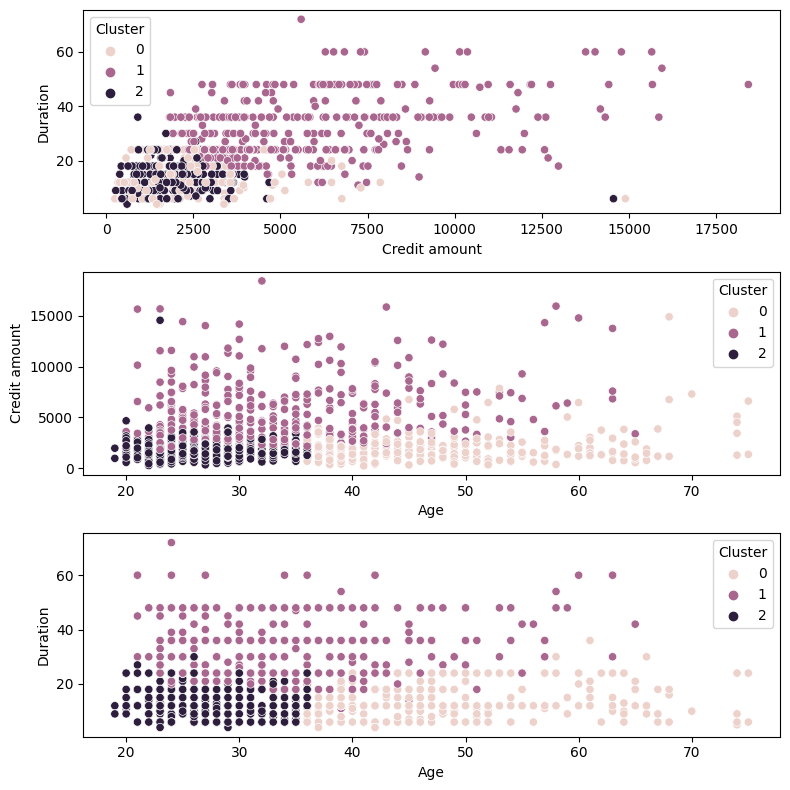

In [103]:
# Visual analysis of cluster via scatterplot.

scatters(clustered_data, 'Cluster')

### Elaboration.

The data above shows the three different clusters highlighted under different colors across different variables. The two clusters that have lower credit amounts and durations are quite distinct which would highlight their lower economic capability, however the other cluster (cluster 1) is much higher in terms of economic capability thus able to take up higher credit amount and duration.

For a simpler distinction observe the table below elaborating the cluster analysis.

In [102]:
# Tabled cluster analysis.

grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.6,1970.5,13.9
1,34.0,5665.4,32.2
2,27.7,1737.5,14.3


# Cluster elaboration.

Cluster 0 – lower mean of credit amount, short duration, older customers

Cluster 1 – high mean of credit amount, long duration, middle-aged customers

Cluster 2 - lower mean of credit amount, short duration, young customers

# Clustering using Affinity Propagation.

In this algorithm there are two relevant parameters: preference and dumping. 

It means that we don’t define upfront number of clusters, algorithm itself chooses their number. I will fix dumping and check number of clusters in function of preference parameter.

Its faster compared to kmeans clustering method.

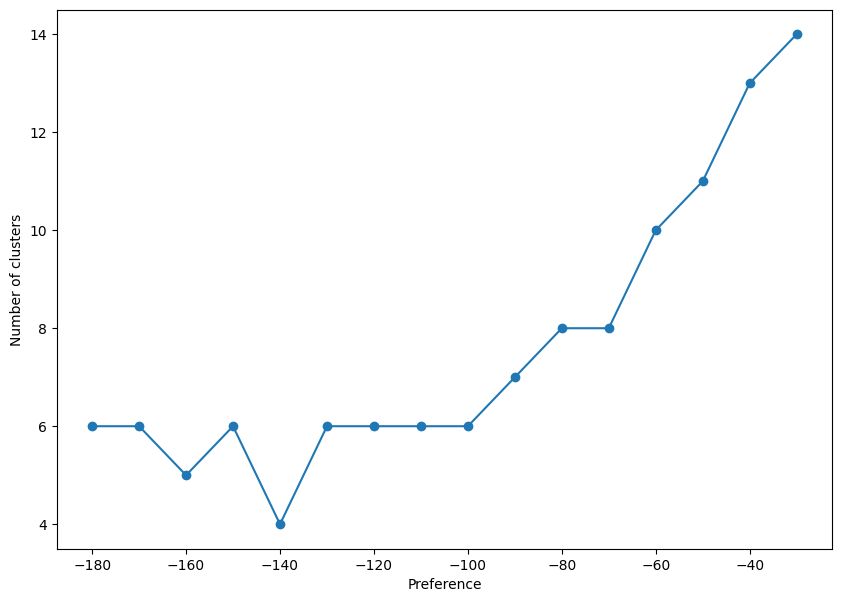

In [104]:
# AP clustering

preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    ap = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_ap = pd.DataFrame(ap.labels_)
    clusters.append(len(ap.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

### Elaboration.

The visualization above shows that the most optimum number of clusters is 4 as it has the highest preference with the least amount of clusters.

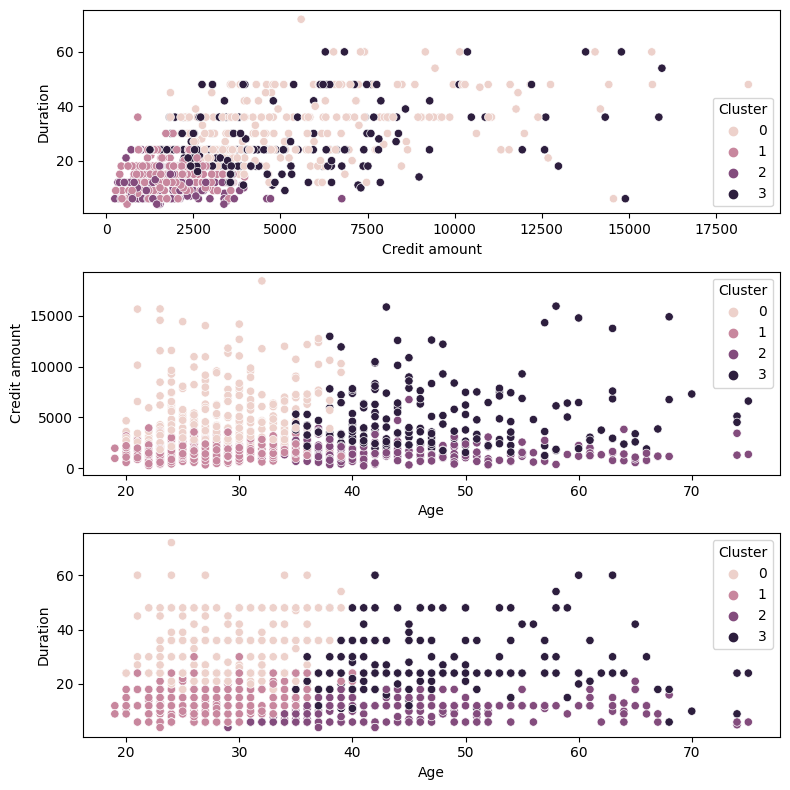

In [105]:
# Visual analysis of cluster via scatterplot.

ap = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_ap = pd.DataFrame(ap.labels_)
n_clusters_ = len(ap.cluster_centers_indices_)

clustered_data_ap = cluster_data.assign(Cluster=labels_ap)
scatters(clustered_data_ap,'Cluster')

grouped_ap = clustered_data_ap.groupby(['Cluster']).mean().round(1)

In [106]:
# Tabled cluster analysis.

grouped_ap = clustered_data_ap.groupby(['Cluster']).mean().round(1)
grouped_ap

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


# Cluster elaboration.

Cluster 0 – high mean of credit amount, long duration, younger customers

Cluster 1 – low mean of credit amount, short duration, younger customers

Cluster 2 - low mean of credit amount, short duration, older customers

Cluster 3 - high mean of credit amount, middle-time duration, older customers

## Conclusion.

Segmenting bank customers through clustering techniques offers significant benefits for both the bank itself and its various stakeholders. Here are some key advantages:

 For Banks:

* Improved Customer Targeting and Marketing: Clustering allows banks to identify distinct customer segments with similar characteristics and needs. This enables them to tailor marketing campaigns and product offerings to specific segments, resulting in greater effectiveness and efficiency.
* Enhanced Customer Relationship Management (CRM): By understanding customer segments better, banks can personalize their interactions and communications, fostering stronger relationships and improving customer satisfaction.
* Risk Management: Customer segmentation can help identify high-risk segments, allowing banks to implement strategies to mitigate potential risks, such as fraud or credit defaults.
* Resource Optimization: Banks can allocate resources, such as personnel and marketing budgets, more efficiently by directing them towards segments with the highest potential for profitability.
* New Product Development: By analyzing the needs and preferences of different segments, banks can develop new products and services that cater to their specific requirements, increasing customer loyalty and driving revenue growth.

 For Stakeholders:

* Improved Customer Experience: Segmented communication and personalized offerings lead to a more satisfying and relevant experience for customers, boosting overall satisfaction and trust in the bank.
* Increased Value Perception: By providing products and services aligned with their needs, customers perceive greater value from the bank's offerings, leading to strengthened relationships and increased loyalty.
* Enhanced Financial Inclusion: Customer segmentation can help banks identify underserved segments and develop strategies to offer them tailored financial products and services, promoting greater financial inclusion.
* Improved Regulatory Compliance: By understanding customer behavior and risk profiles better, banks can better comply with regulations and mitigate potential regulatory risks.

 Overall, customer segmentation via clustering empowers banks to make data-driven decisions, optimize their operations, and deliver a more personalized and satisfying experience for their customers. This ultimately leads to increased profitability, stronger stakeholder relationships, and a competitive advantage in the market.

Some additional examples of how customer segmentation can benefit other stakeholders:

* Investors: By analyzing the performance of different customer segments, investors can gain valuable insights into the bank's future growth potential and make informed investment decisions.
* Regulators: Customer segmentation can help regulators identify systemic risks within the financial system and develop targeted policies to maintain financial stability.
* Employees: By understanding the needs and expectations of different customer segments, bank employees can provide better service and build stronger relationships with their clients.


It's important to note that the success of customer segmentation depends heavily on the chosen clustering technique, the quality of data used, and the ongoing monitoring and refinement of the segmentation model. By implementing a robust and well-maintained segmentation strategy, banks can unlock the full potential of this powerful technique and reap significant benefits for themselves and their stakeholders.